In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [2]:
#Dataset

file_path = r'C:\Users\luigi\Desktop\Final Proj\Indian Liver Patient Dataset (ILPD).csv'

col_names=['Age','Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Target']
df = pd.read_csv(file_path, header=None, names=col_names)

df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df['Target'].value_counts()

Target
1    416
2    167
Name: count, dtype: int64

In [4]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Target     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None
              Age          TB          DB      Alkphos         Sgpt  \
count  583.000000  583.000000  583.000000   583.000000   583.000000   
mean    44.746141    3.298799    1.486106   290.576329    80.713551   
std     16.189833    6.209522    2.808498   242.937989   182.620356   
min      4.000000    0.

In [5]:
# Conversion of categorical variable 'Gender'
df['Gender'] = np.where(df['Gender']== 'Female', 1, 0)
df['Gender']

0      1
1      0
2      0
3      0
4      0
      ..
578    0
579    0
580    0
581    0
582    0
Name: Gender, Length: 583, dtype: int32

In [6]:
# Convert target variable to binary
df['Target'] = np.where(df['Target'] == 1, 1, 0)
df['Target']

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Target, Length: 583, dtype: int32

In [7]:
df['Target'].value_counts()

Target
1    416
0    167
Name: count, dtype: int64

In [8]:
# Check for missing values
print(df.isnull().sum())

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Target       0
dtype: int64


In [9]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [10]:
print(df.isnull().sum())

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Target       0
dtype: int64


In [11]:
#Clean
cleaned_file_path = r'C:\Users\luigi\Desktop\Final Proj\Clean Liver Data.csv'

df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_file_path}")

Cleaned dataset saved to: C:\Users\luigi\Desktop\Final Proj\Clean Liver Data.csv


In [12]:
#Feature Engineering
df['TB/DB Ratio'] = df['TB'] / df['DB']
df['TB/DB Ratio']

0      7.000000
1      1.981818
2      1.780488
3      2.500000
4      1.950000
         ...   
578    5.000000
579    6.000000
580    4.000000
581    2.600000
582    3.333333
Name: TB/DB Ratio, Length: 583, dtype: float64

In [13]:
# Define features and target variable
features = df.drop(columns=['Target'])
target = df['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [14]:
# Model Training and Evaluation
# Function to evaluate models
def evaluate_model(model, X_test, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, report, matrix

In [15]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr, prec_lr, rec_lr, report_lr, matrix_lr = evaluate_model(lr, X_test, y_test, y_pred_lr)

In [16]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf, prec_rf, rec_rf, report_rf, matrix_rf = evaluate_model(rf, X_test, y_test, y_pred_rf)

In [17]:
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt, prec_dt, rec_dt, report_dt, matrix_dt = evaluate_model(dt, X_test, y_test, y_pred_dt)

In [18]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn, prec_knn, rec_knn, report_knn, matrix_knn = evaluate_model(knn, X_test, y_test, y_pred_knn)

In [19]:
#Comparing Models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K-Nearest Neighbors']
accuracies = [acc_lr, acc_rf, acc_dt, acc_knn]
precisions = [prec_lr, prec_rf, prec_dt, prec_knn]
recalls = [rec_lr, rec_rf, rec_dt, rec_knn]

In [20]:
# Create a DataFrame to display the results
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls
})

print(results)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.692308   0.701923  0.935897
1        Random Forest  0.683761   0.715789  0.871795
2        Decision Tree  0.658120   0.726190  0.782051
3  K-Nearest Neighbors  0.675214   0.717391  0.846154


In [21]:
# Display classification reports
print("Logistic Regression:\n", report_lr)
print("Random Forest:\n", report_rf)
print("Decision Tree:\n", report_dt)
print("K-Nearest Neighbors:\n", report_knn)

Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.21      0.31        39
           1       0.70      0.94      0.80        78

    accuracy                           0.69       117
   macro avg       0.66      0.57      0.55       117
weighted avg       0.67      0.69      0.64       117

Random Forest:
               precision    recall  f1-score   support

           0       0.55      0.31      0.39        39
           1       0.72      0.87      0.79        78

    accuracy                           0.68       117
   macro avg       0.63      0.59      0.59       117
weighted avg       0.66      0.68      0.66       117

Decision Tree:
               precision    recall  f1-score   support

           0       0.48      0.41      0.44        39
           1       0.73      0.78      0.75        78

    accuracy                           0.66       117
   macro avg       0.61      0.60      0.60       117
weighted avg       0

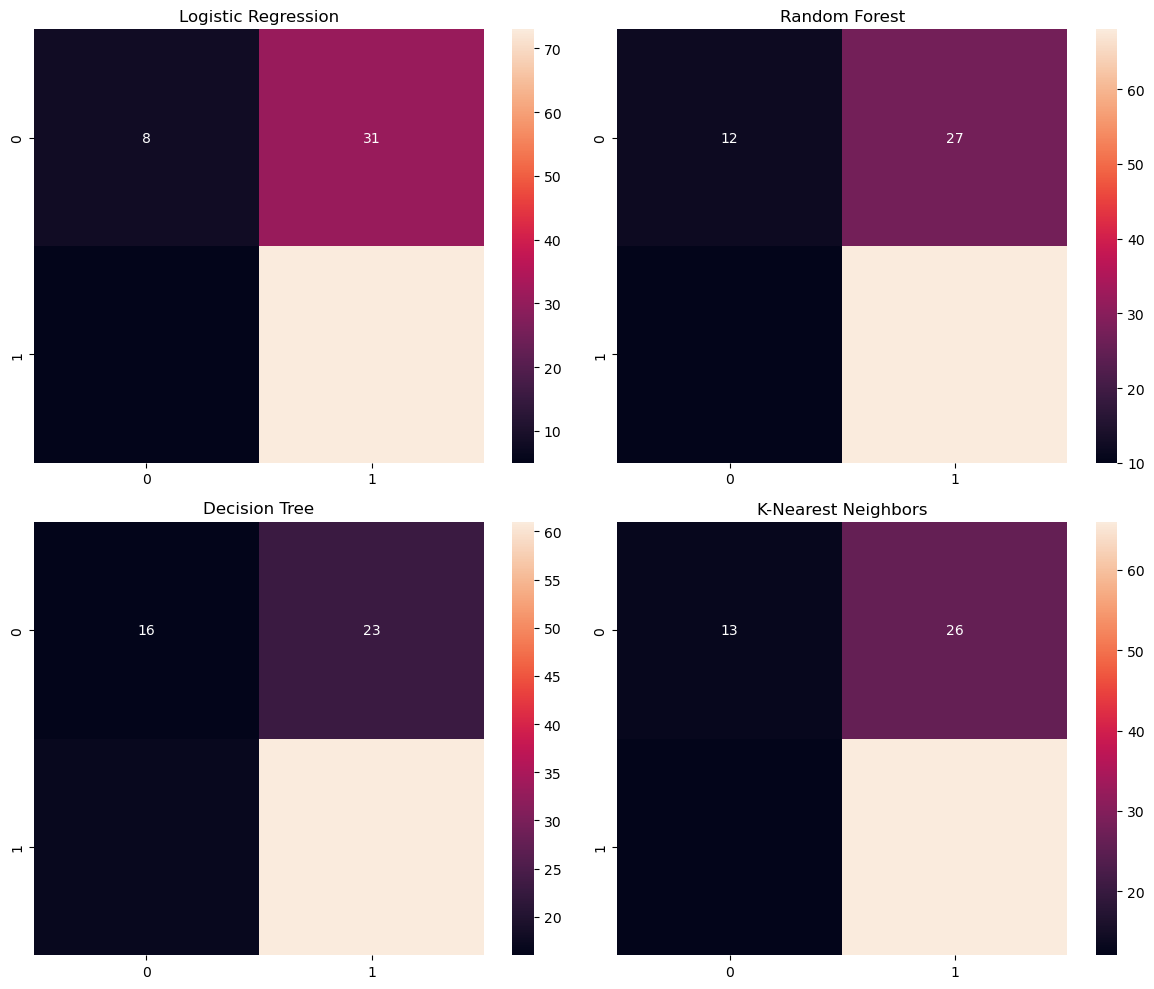

In [22]:
# Display confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(matrix_lr, annot=True, fmt='d', ax=axes[0,0])
axes[0,0].set_title('Logistic Regression')
sns.heatmap(matrix_rf, annot=True, fmt='d', ax=axes[0,1])
axes[0,1].set_title('Random Forest')
sns.heatmap(matrix_dt, annot=True, fmt='d', ax=axes[1,0])
axes[1,0].set_title('Decision Tree')
sns.heatmap(matrix_knn, annot=True, fmt='d', ax=axes[1,1])
axes[1,1].set_title('K-Nearest Neighbors')

plt.tight_layout()
plt.show()